In [1]:

import seaborn as sns
import pandas as pd

import numpy as np
import pickle

import time

import matplotlib.pyplot as plt

In [2]:
with open('../data/pickledcooking.pkl','rb') as x:
    df_cook = pickle.load(x)

In [3]:
with open('../data/pickledbeginners.pkl','rb') as x:
    df_cforb = pickle.load(x)

In [4]:
df_cook['sub'] = 'r/Cooking'

df_cforb['sub'] = 'r/Cookingforbeginners'

The following with https://www.geeksforgeeks.org/finding-the-quantile-and-decile-ranks-of-a-pandas-dataframe-column/ https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

In [5]:
df_cook['quintile'] = pd.qcut(df_cook['created_utc'],q=5,labels=['1st','2nd','3rd','4th','5th'])

In [6]:
removedlist = [(quint,df_cook[(df_cook['selftext']=='[removed]')&(df_cook['quintile']==quint)].shape[0]/(len(df_cook)/5)) 
 for quint in df_cook['quintile'].unique()]

In [7]:
removedlist.reverse()

In [8]:
removedlist

[('1st', 0.25387740029542094),
 ('2nd', 0.22572008862629245),
 ('3rd', 0.1292466765140325),
 ('4th', 0.09324224519940916),
 ('5th', 0.06831610044313145)]

In [9]:
df_cforb['quintile'] = pd.qcut(df_cforb['created_utc'],q=5,labels=['1st','2nd','3rd','4th','5th'])

In [10]:
removedlistb = [(quint,df_cforb[(df_cforb['selftext']=='[removed]')&(df_cforb['quintile']==quint)].shape[0]/(len(df_cforb)/5)) 
 for quint in df_cforb['quintile'].unique()]

In [11]:
removedlistb.reverse()

In [12]:
removedlistb

[('1st', 0.06179101724614959),
 ('2nd', 0.06801623167020197),
 ('3rd', 0.20128193304436043),
 ('4th', 0.22041870331089183),
 ('5th', 0.1856036152356359)]

In [18]:
x1,y1 = zip(*removedlist)
x2,y2 = zip(*removedlistb)

In [21]:
axis = np.arange(len(x1))

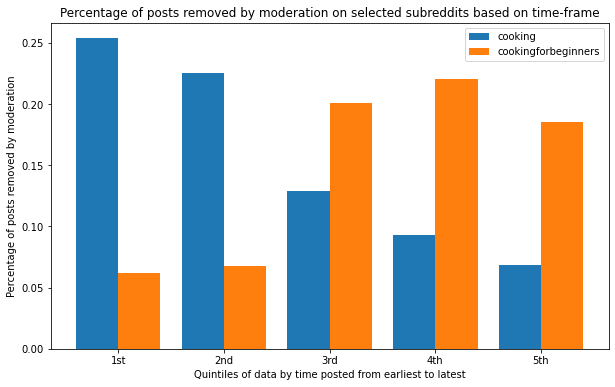

In [30]:
plt.figure(figsize=(10,6))
plt.bar(axis-0.2,y1,0.4,label='cooking')
plt.bar(axis+0.2,y2,0.4,label='cookingforbeginners')
plt.xticks(axis,x1)
plt.xlabel('Quintiles of data by time posted from earliest to latest')
plt.ylabel('Percentage of posts removed by moderation')
plt.title('Percentage of posts removed by moderation on selected subreddits based on time-frame')
plt.legend()
plt.show()

In [31]:
blanklist = [(quint,df_cook[(df_cook['selftext']=='')&(df_cook['quintile']==quint)].shape[0]/(len(df_cook)/5)) 
 for quint in df_cook['quintile'].unique()]

In [32]:
blanklist.reverse()

In [41]:
blanklistb = [(quint,df_cforb[(df_cforb['selftext']=='')&(df_cforb['quintile']==quint)].shape[0]/(len(df_cforb)/5)) 
 for quint in df_cforb['quintile'].unique()]

In [42]:
blanklistb.reverse()

In [43]:
x3,y3 = zip(*blanklist)
x4,y4 = zip(*blanklistb)

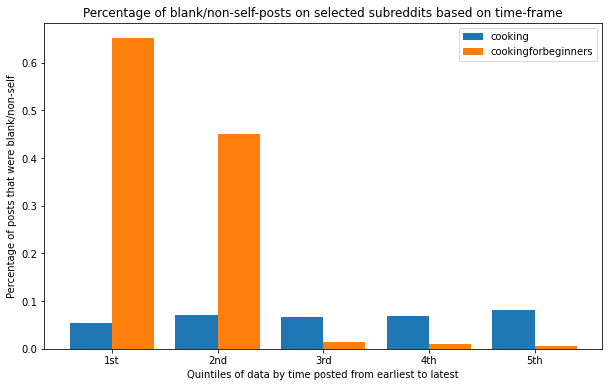

In [46]:
plt.figure(figsize=(10,6))
plt.bar(axis-0.2,y3,0.4,label='cooking')
plt.bar(axis+0.2,y4,0.4,label='cookingforbeginners')
plt.xticks(axis,x1)
plt.xlabel('Quintiles of data by time posted from earliest to latest')
plt.ylabel('Percentage of posts that were blank/non-self')
plt.title('Percentage of blank/non-self-posts on selected subreddits based on time-frame')
plt.legend()
plt.show()